# LINEAR REGRESSION ASSUMPTIONS

Linearity: The relationship between the dependent and independent variables is linear.
( slope is constant in linear models)

No multicollinearity: The independent variables are not highly correlated with each other.

Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
Eg : work exp  vs salary 
model will be biased towards the low x values 

Normality: The errors follow a normal distribution.

No endogeneity: There is no relationship between the errors(dependent variable)
and the independent variables.

Autocorrelation : no relationships between the residuals.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [6]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]


In [8]:
X

,feature1,feature2,feature3
0,-0.570563,1.420342,0.495580
1,-0.990563,0.556965,1.045064
2,-0.674728,0.150617,1.774645
3,0.388250,-0.387127,-0.110229
4,1.167882,-0.024104,0.145063
...,...,...,...
195,0.255081,-0.231497,-0.239632
196,0.276068,-0.648411,-0.077441
197,0.122250,-1.157383,0.765721
198,-0.914822,-0.897140,-0.784205


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_test

In [13]:
# Residual
y_pred = model.predict(X_test)


In [ ]:
y_test

In [15]:
y_pred

array([ -34.76883341,  190.67135514,   14.04224122,  -16.3715581 ,
        118.17558768, -107.77390191,  -40.20553863,   93.06420644,
         -7.3512859 ,   28.47554765,   15.26138536, -107.45700707,
         64.50359715,  143.2359111 ,  -20.97314353,  137.79488969,
        -50.72450467,  168.27219255,   60.80874417,  179.43251544,
         32.66581961,   21.10166299,   69.55019994,  -13.04136716,
         -1.88792469, -106.29378502,  179.16218587, -120.92336473,
        -31.51039885,  134.36018807,  107.13086641,  -10.52841354,
          6.92995851,   53.08006944,   27.61938445,  -47.06498585,
         13.63636605,  102.93836476,  -50.85751435,   80.16839852,
        171.72181145,  -21.9406968 , -124.23145342,  -64.56750574,
       -106.29193084,  -99.41609941,  -51.73488661,  108.17430767,
       -156.29911188,  160.99011399,  -58.12394403,  -58.3330757 ,
         25.06769006,   24.78558548,   86.34740515,   14.38094821,
        -16.70618586,   54.61570835,  -40.02749639,  140.44807

In [22]:
residual = y_test - y_pred

In [23]:
residual

58     32.308068
40      0.469044
34    -31.328091
102    22.081161
184   -19.482249
198    14.538118
95    -13.061868
4      -6.400560
29     39.202565
168   -29.290449
171     4.752482
18    -19.575694
11     -3.006519
89    -10.392463
110   -21.258880
118    11.557545
159     8.624475
35    -18.070497
136    -4.940765
59     35.614240
51     20.123998
16     12.273934
44    -26.318601
94    -45.953275
31      3.377609
162   -11.495436
38     10.971807
28      6.303389
193   -12.763183
27      8.718835
47    -14.223529
165    15.871494
194     8.465019
177    20.245673
176   -20.197709
97     14.876704
174    -3.579682
73     24.320424
69    -18.932354
172     4.893949
108    22.493346
107   -37.729243
189   -28.401771
14    -41.041903
56     11.185857
19      2.093656
114   -12.963090
39     18.615671
185   -22.478711
124    12.422030
98     -2.292401
123     7.673697
119    20.010544
53      7.098087
33      0.779413
179    33.592062
181   -23.140018
106    20.907780
199    -2.7446

## 1. Linear Relationship

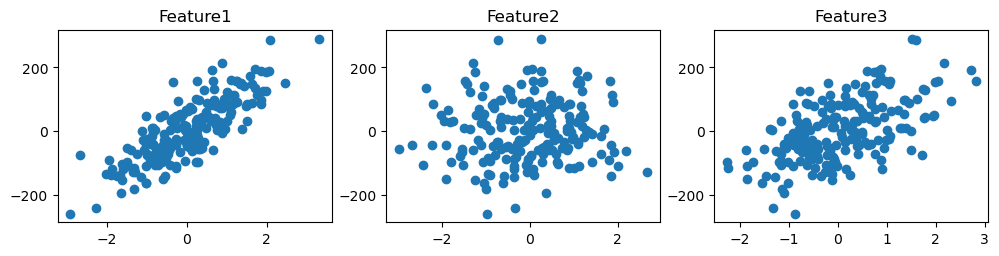

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])

ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

## 2. Multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [26]:
vif

[1.010325703322973, 1.0098710800698707, 1.013950197312655]

In [27]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

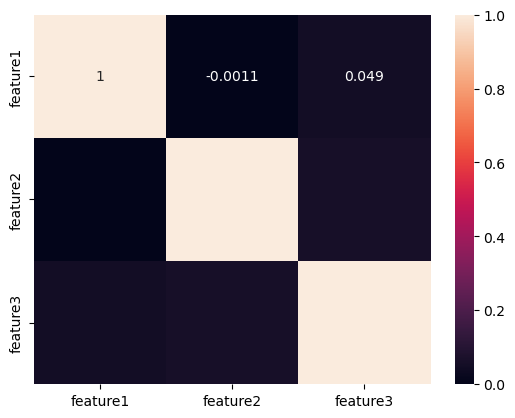

In [28]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

corr = -1 to 1

In [ ]:
car :  no of hr : elect : raw matre


## 3. Normality of Residual

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


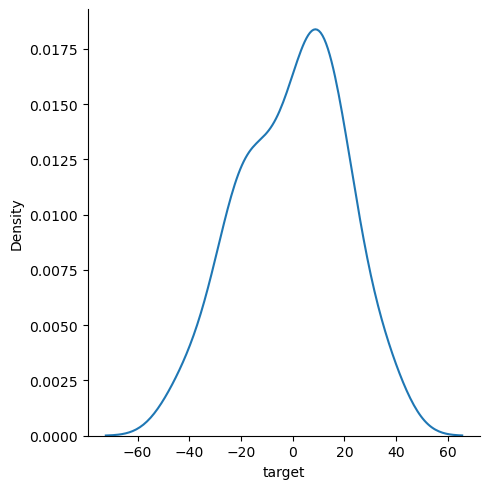

In [30]:
sns.displot(residual,kind='kde')

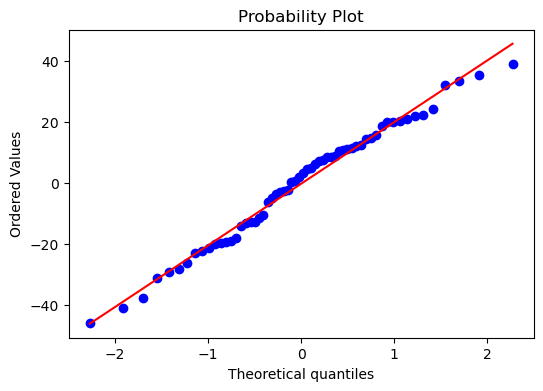

In [14]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

## 4. Homoscedasticity

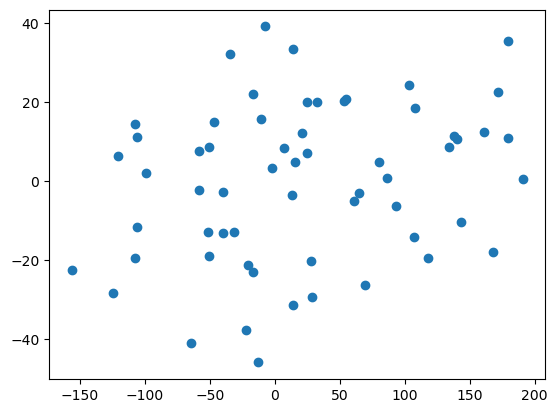

In [15]:
plt.scatter(y_pred,residual)

## 5. Autocorrelation of Residuals

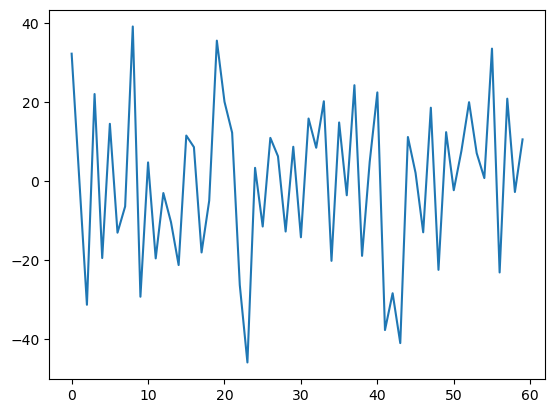

In [16]:
plt.plot(residual)

In [62]:
import numpy as np
from statsmodels.stats.stattools import durbin_watson

d = durbin_watson(residual)  
print(d)

2.3116870552230027
